In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load in the dataste
df = pd.read_csv("flood.csv")

Basic Overview of Data


In [3]:
# Check some data, and check their cols
df.sample(3)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
5525,5,5,3,4,5,5,1,6,3,2,...,4,4,4,8,5,4,2,1,8,0.410
9283,4,4,3,1,10,3,7,2,9,7,...,3,7,12,3,5,8,5,7,1,0.520
45574,7,2,7,1,3,2,6,5,5,6,...,8,6,6,3,3,5,5,5,3,0.475


In [4]:
# Check the dimension of the csv file
df.shape

(50000, 21)

In [5]:
# Check basic information of the cols and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [6]:
# Check the names of the cols
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [7]:
# Dropping unnecessary columns
df = df.drop(['PopulationScore', 'PoliticalFactors'], axis = 1)

EDA

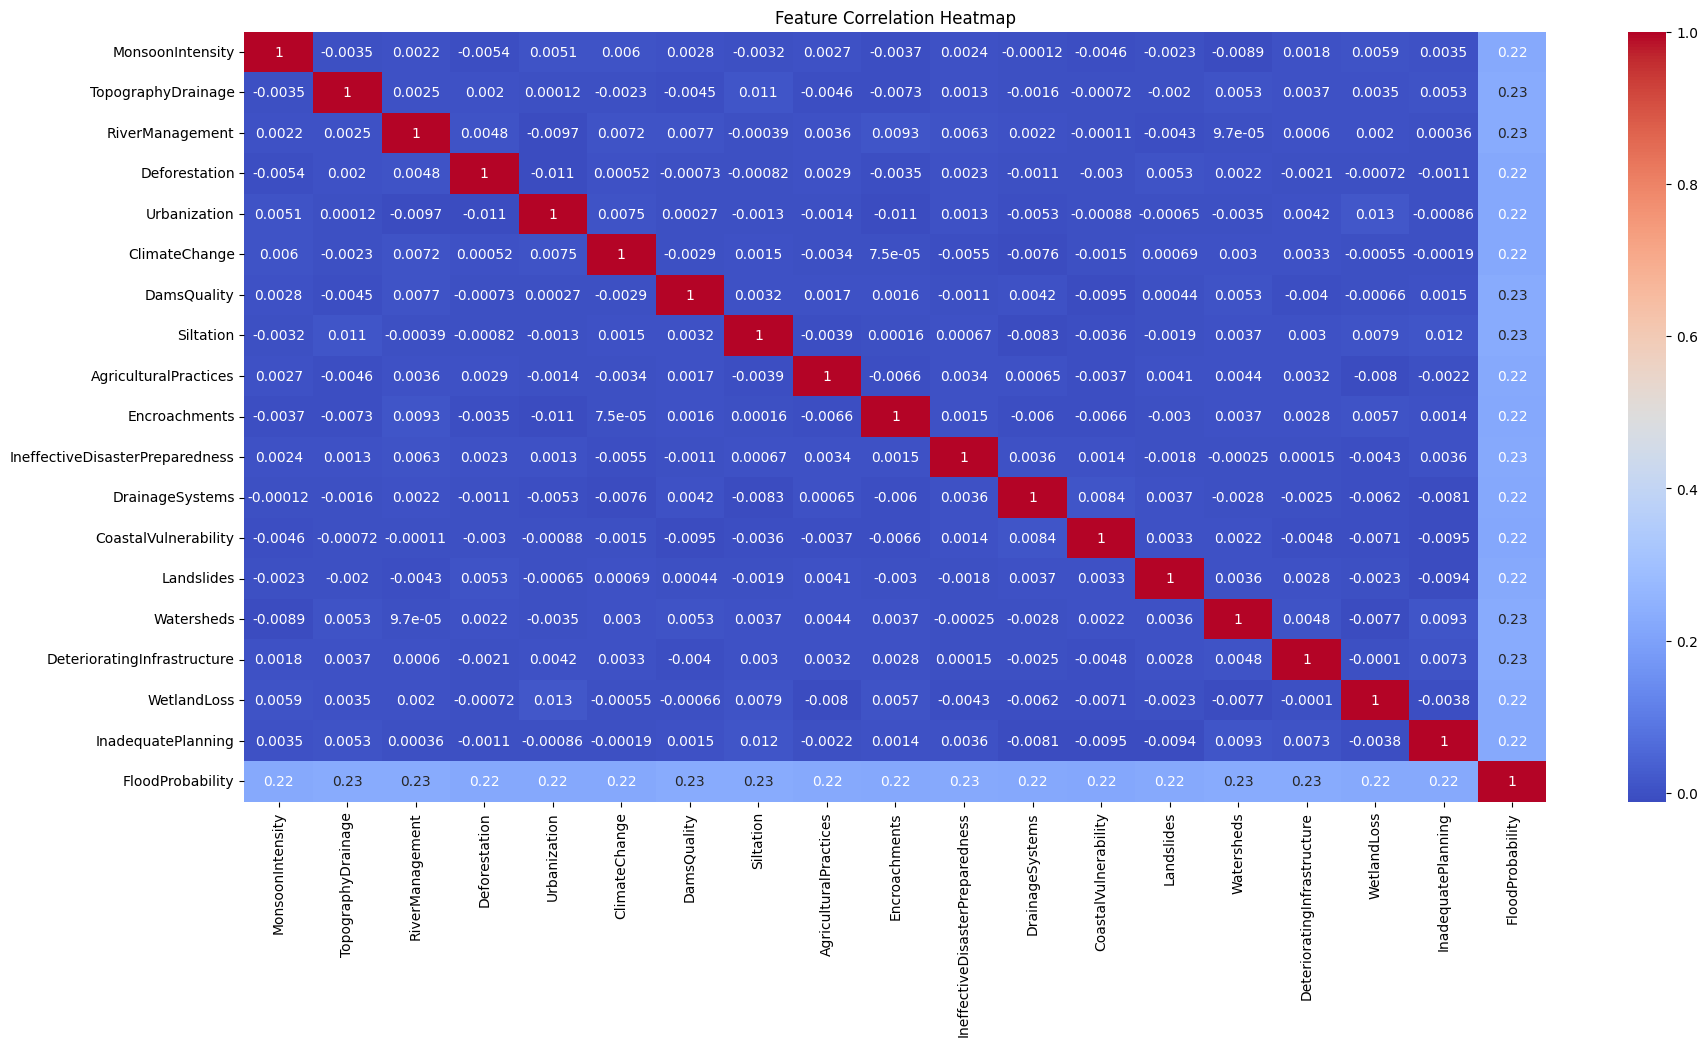

In [8]:
# Correlation Heatmap
plt.figure(figsize=(21, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

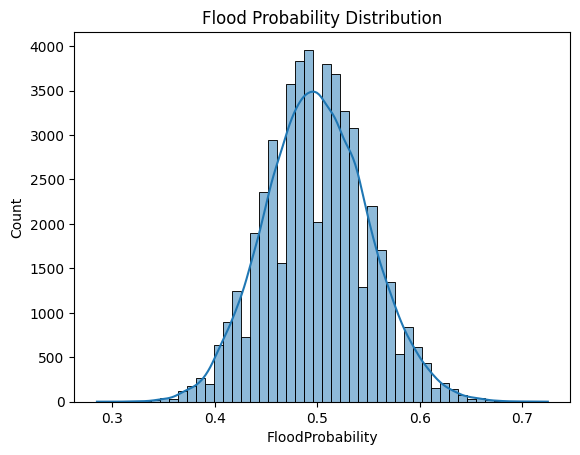

In [9]:
# Distribution of target
sns.histplot(df['FloodProbability'], kde=True, bins = 50)
plt.title("Flood Probability Distribution")
plt.show()

In [10]:
numeric_cols = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'WetlandLoss',
       'InadequatePlanning']

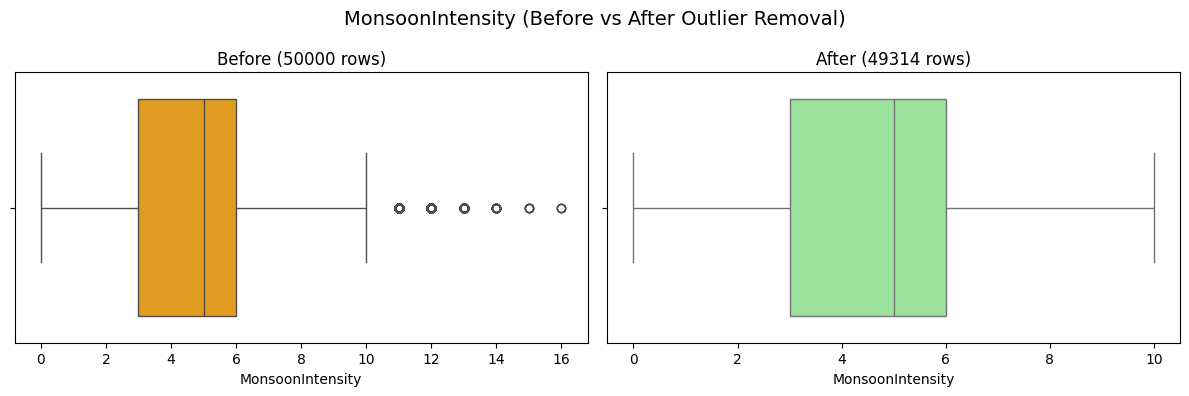

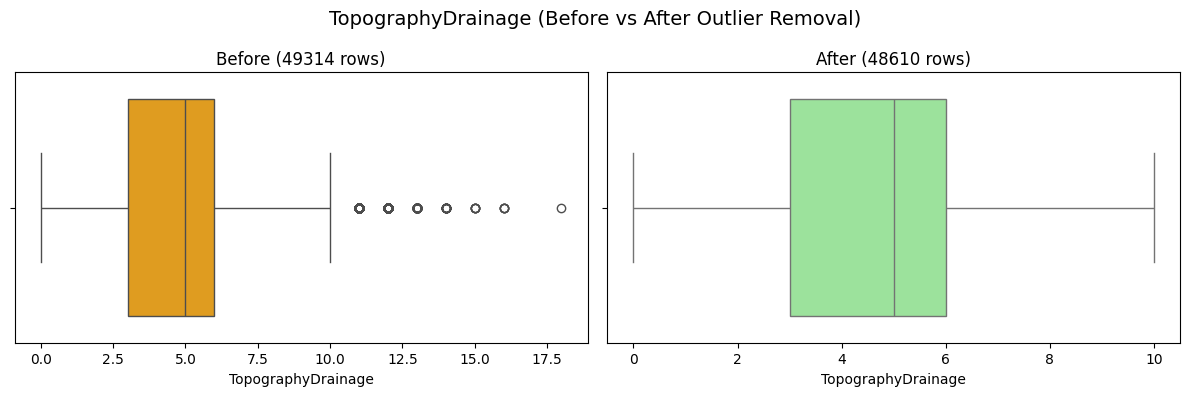

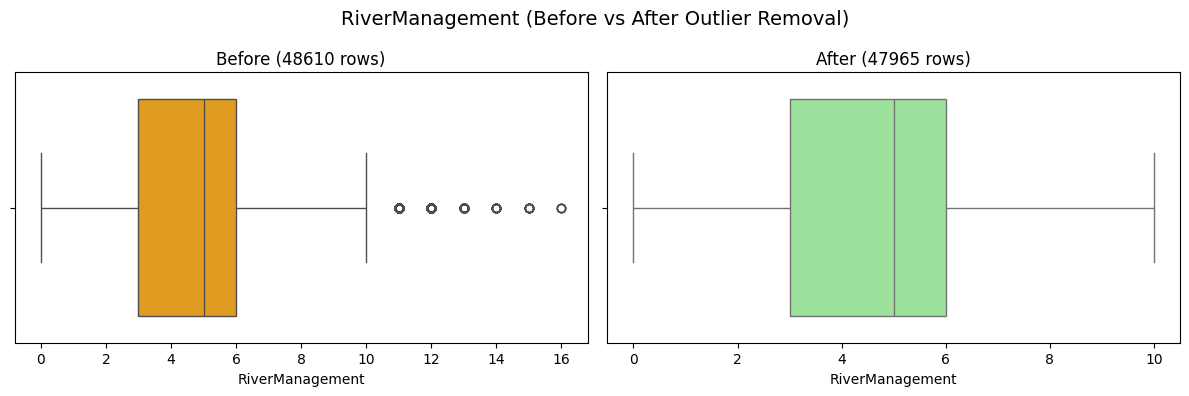

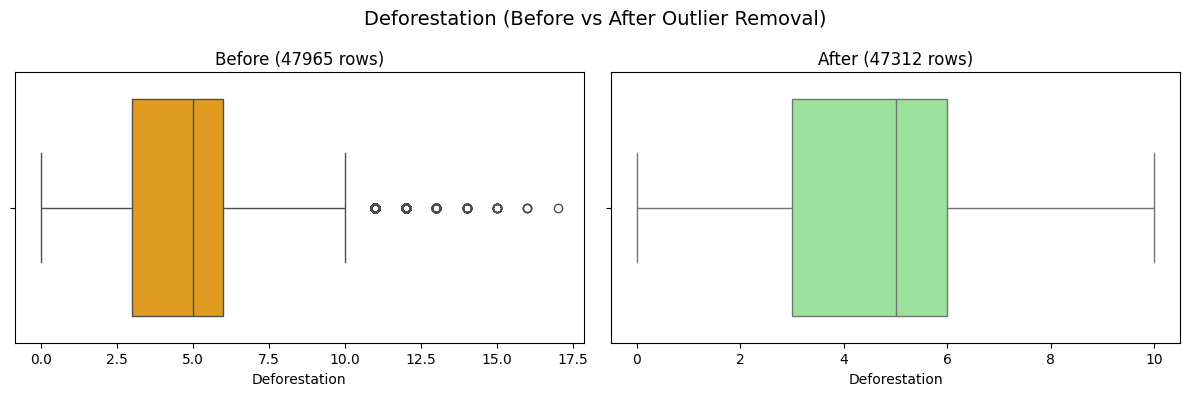

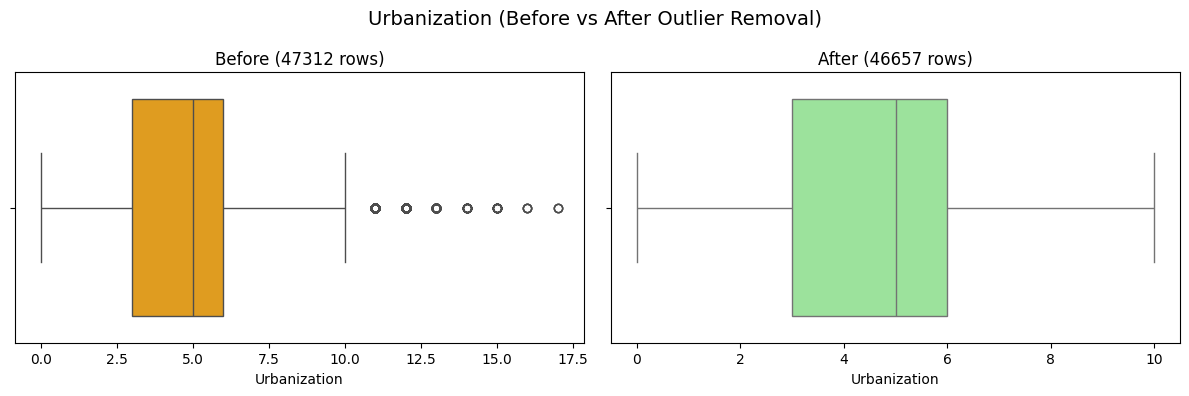

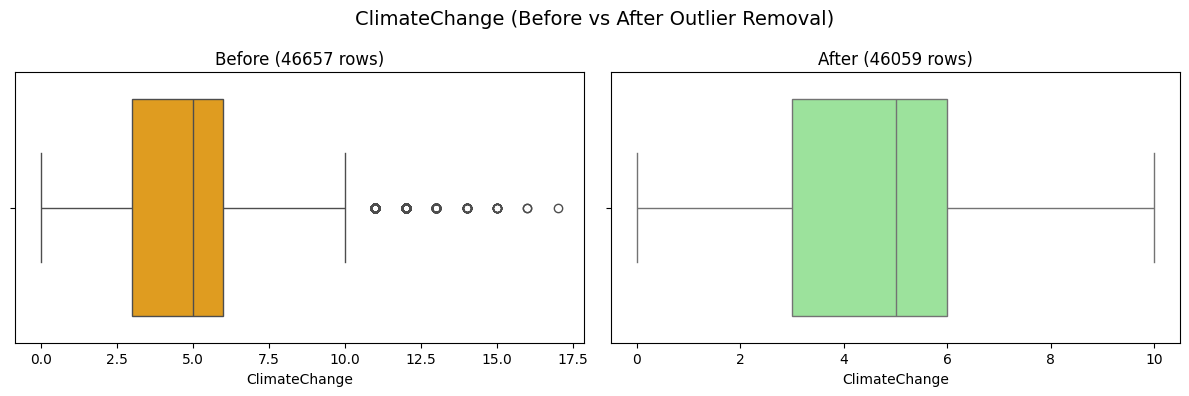

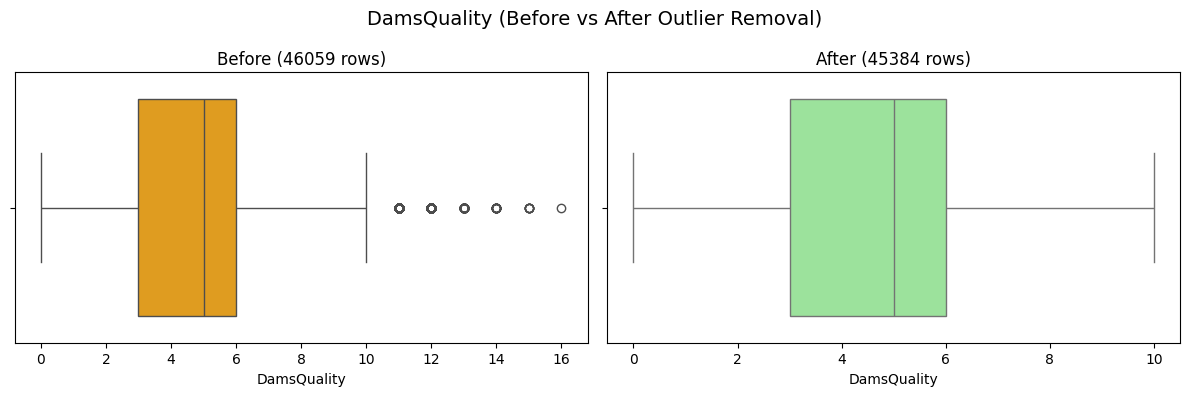

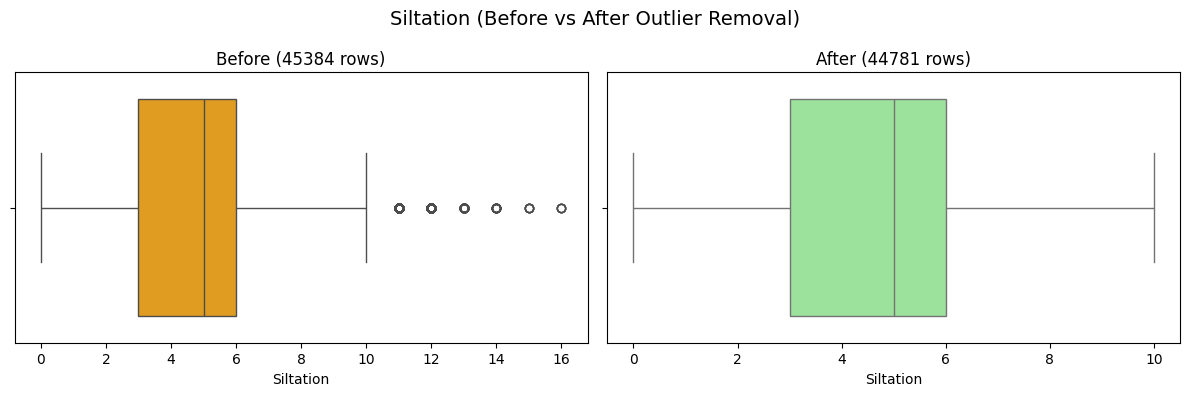

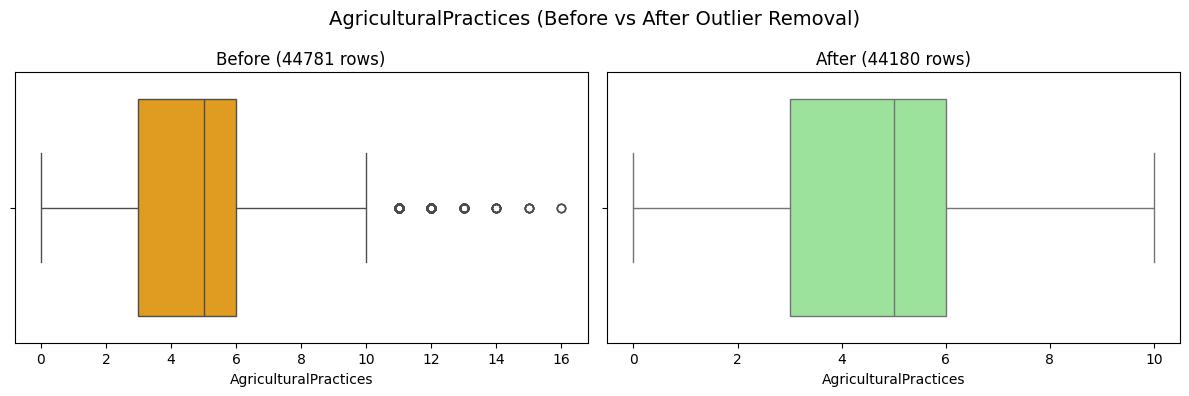

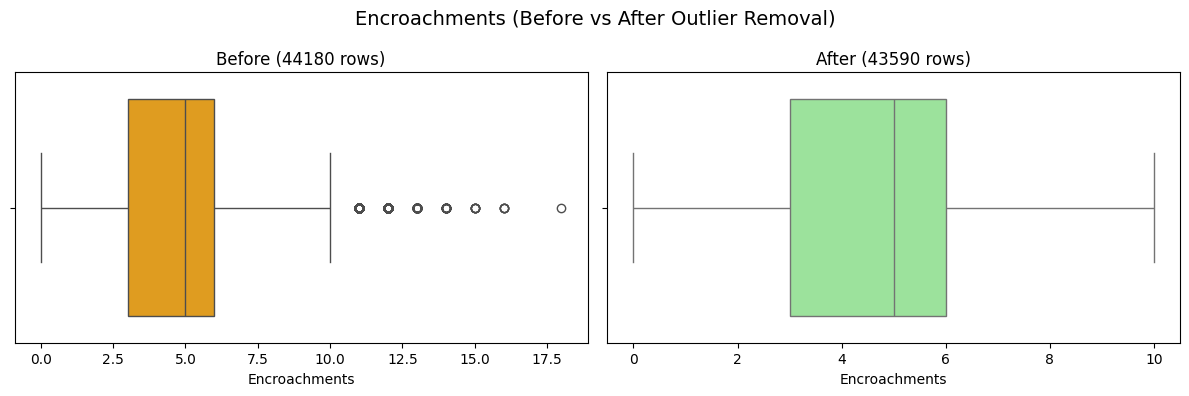

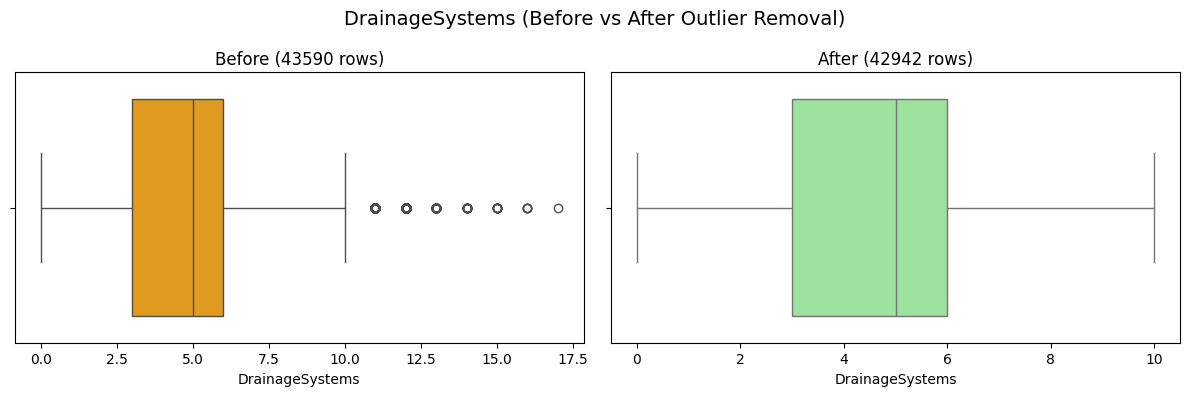

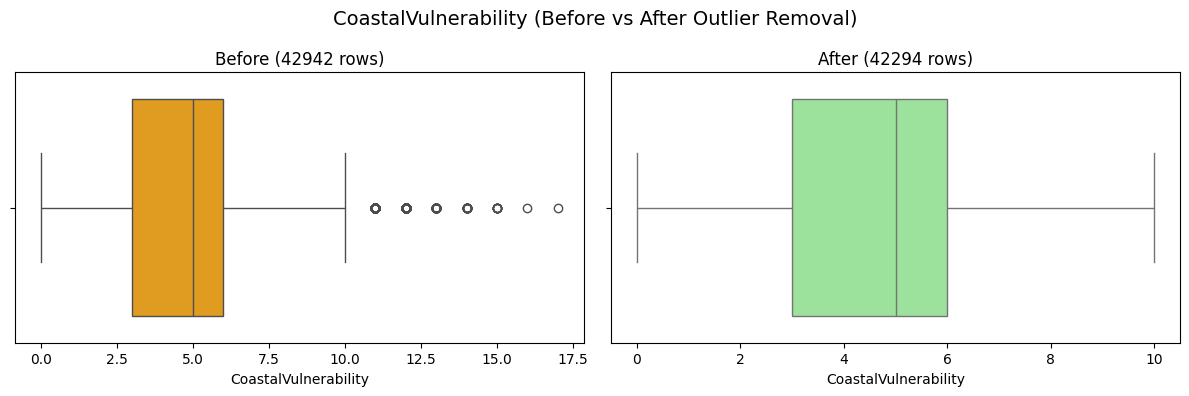

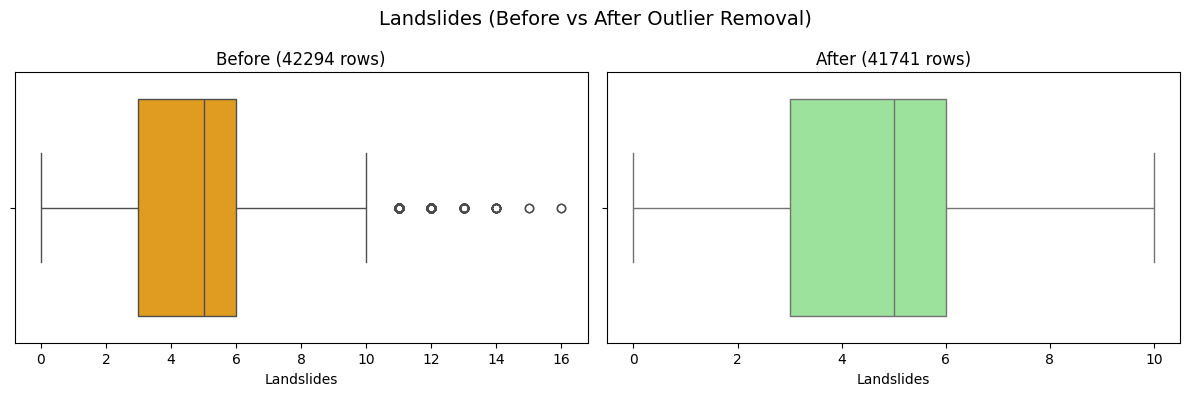

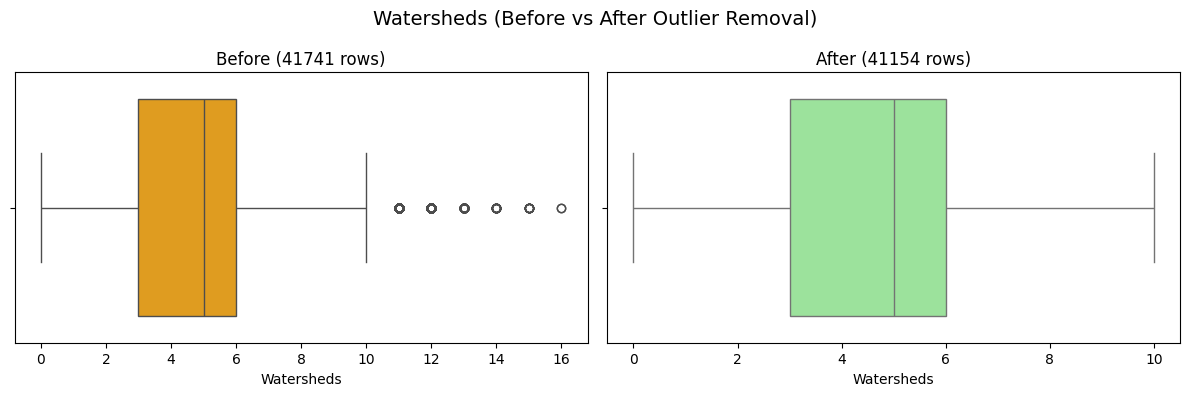

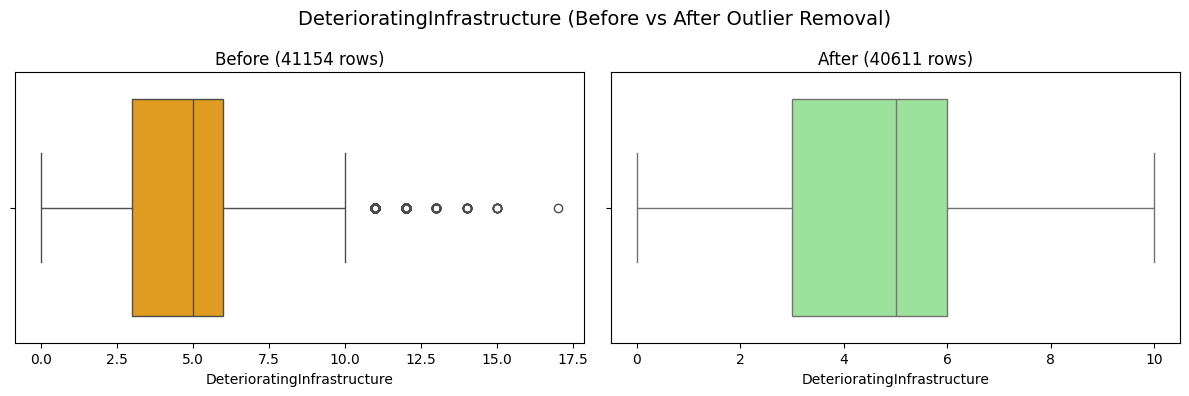

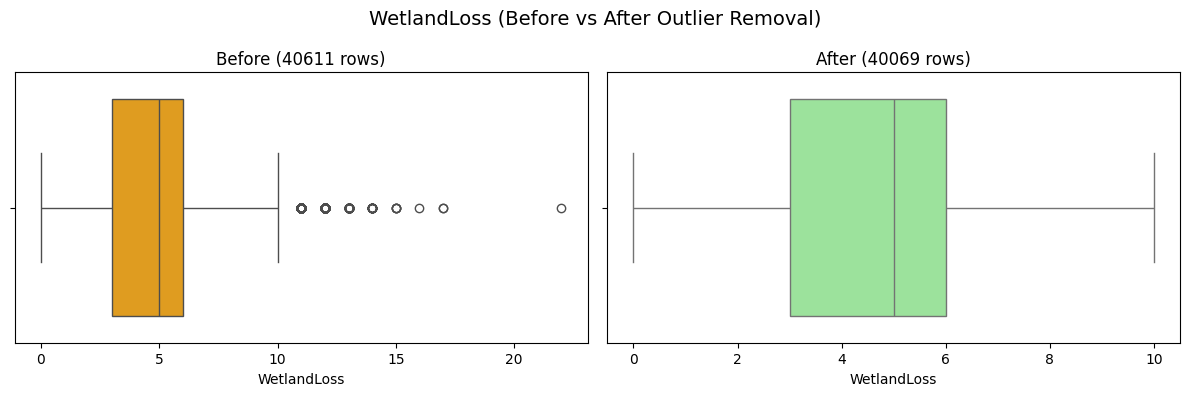

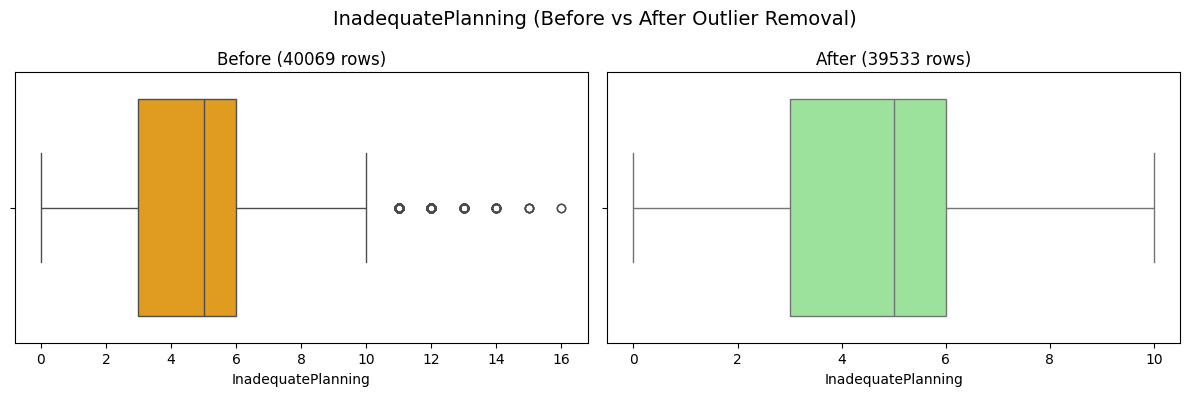

In [11]:
# Box plot
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

def plot_before_after(data, col):
    # Cleaned data
    cleaned = remove_outliers(data, col)

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    fig.suptitle(f'{col} (Before vs After Outlier Removal)', fontsize=14)

    # Before
    sns.boxplot(x=data[col], ax=axes[0], color='orange')
    axes[0].set_title(f'Before ({len(data)} rows)')
    axes[0].set_xlabel(col)

    # After
    sns.boxplot(x=cleaned[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'After ({len(cleaned)} rows)')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

    return cleaned

# Apply for all numeric columns
for col in numeric_cols:
    df = plot_before_after(df, col)

Training the data split

In [12]:
# Separate features and target
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression and Random Forest

In [15]:
# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [16]:
# Train and evaluate Linear Regression
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Linear Regression Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"R²: {r2_score(y_test, y_pred_lr):.4f}")

Linear Regression Results:
MSE: 0.0002
R²: 0.8926


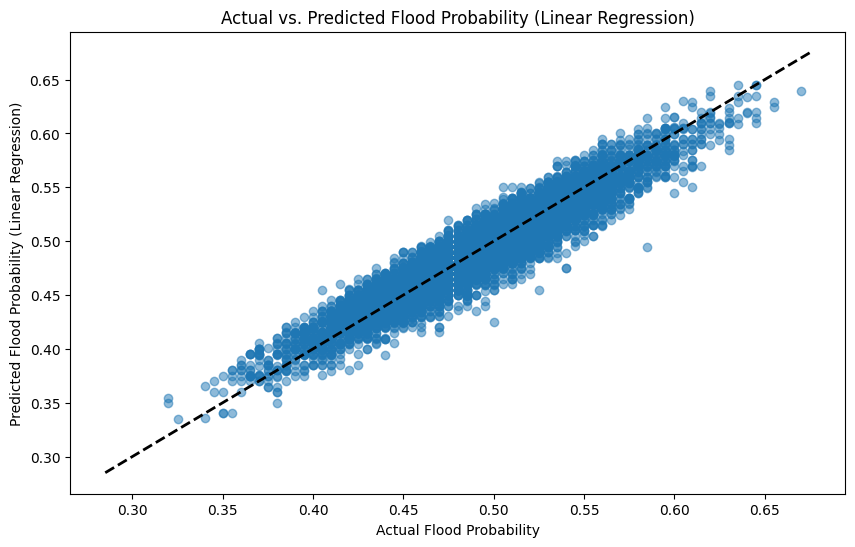

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability (Linear Regression)")
plt.title("Actual vs. Predicted Flood Probability (Linear Regression)")
plt.show()

In [18]:
# Train and evaluate Random Forest
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")
print(f"R²: {r2_score(y_test, y_pred_rf):.4f}")


Random Forest Results:
MSE: 0.0007
R²: 0.6908


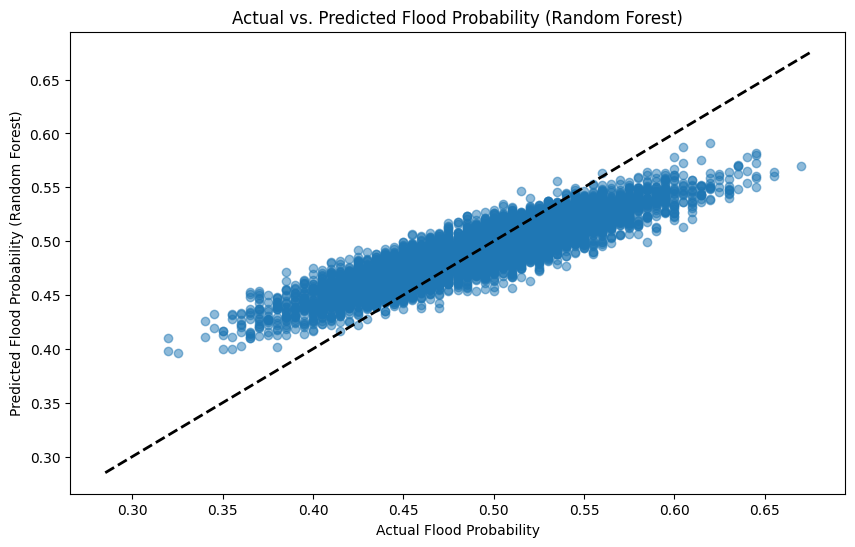

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability (Random Forest)")
plt.title("Actual vs. Predicted Flood Probability (Random Forest)")
plt.show()

In [20]:
# Feature importance analysis
print("\nLinear Regression Coefficients:")
lr_coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values('Coefficient', ascending=False)
print(lr_coeffs)

print("\nRandom Forest Feature Importances:")
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)
print(rf_importances)


Linear Regression Coefficients:
                            Feature  Coefficient
10  IneffectiveDisasterPreparedness     0.011081
6                       DamsQuality     0.010746
12             CoastalVulnerability     0.010643
1                TopographyDrainage     0.010643
15      DeterioratingInfrastructure     0.010581
7                         Siltation     0.010550
13                       Landslides     0.010545
8             AgriculturalPractices     0.010543
9                     Encroachments     0.010538
4                      Urbanization     0.010537
16                      WetlandLoss     0.010534
0                  MonsoonIntensity     0.010532
17               InadequatePlanning     0.010494
3                     Deforestation     0.010481
2                   RiverManagement     0.010444
14                       Watersheds     0.010435
11                  DrainageSystems     0.010383
5                     ClimateChange     0.010215

Random Forest Feature Importances:


PySpark Parallelism

In [21]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col

In [22]:
# Create or call spark session
spark = SparkSession.builder.appName("FloodPrediction").getOrCreate()

In [23]:
# Convert pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(df)

In [24]:
target_col = 'FloodProbability'
feature_cols = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'WetlandLoss',
       'InadequatePlanning']

In [25]:
# Assemble features into a vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_df = assembler.transform(spark_df)

In [26]:
# Standardize features
scaler_spark = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)
scaler_model = scaler_spark.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)

In [27]:
# Split data into training and testing sets
(training_data, testing_data) = scaled_df.randomSplit([0.8, 0.2], seed=42)

In [28]:
# PySpark Linear Regression
lr_spark = LinearRegression(featuresCol="scaledFeatures", labelCol=target_col)
lr_model_spark = lr_spark.fit(training_data)

In [29]:
# Make predictions
predictions_lr_spark = lr_model_spark.transform(testing_data) # Linear Regression

In [30]:
# Evaluate the model
evaluator_rmse = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="rmse")
rmse_spark_lr = evaluator_rmse.evaluate(predictions_lr_spark)
print(f"RMSE: {rmse_spark_lr:.4f}")

evaluator_mae = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="mae")
mae_spark_lr = evaluator_mae.evaluate(predictions_lr_spark)
print(f"MAE: {mae_spark_lr:.4f}")

evaluator_r2 = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="r2")
r2_spark_lr = evaluator_r2.evaluate(predictions_lr_spark)
print(f"R²: {r2_spark_lr:.4f}")

RMSE: 0.0194
MAE: 0.0154
R²: 0.8333


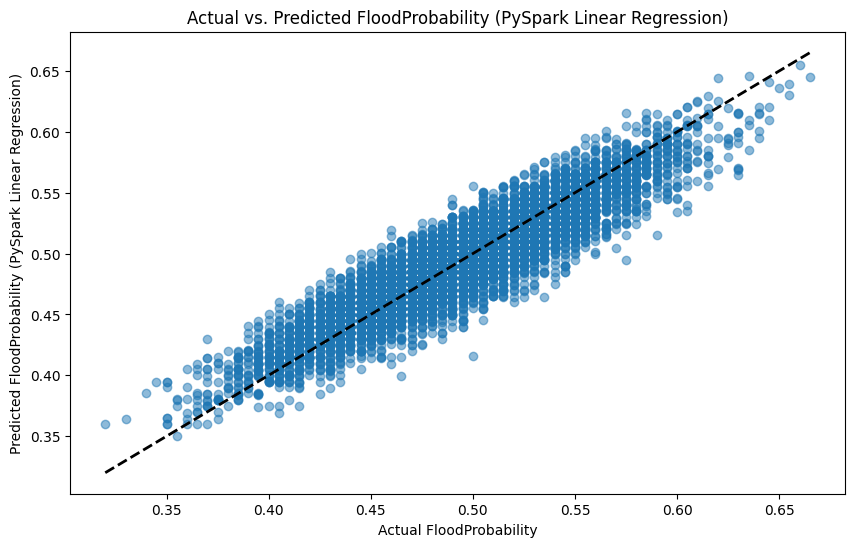

In [31]:
actual_lr_spark = predictions_lr_spark.select(target_col).rdd.flatMap(lambda x: x).collect()
predicted_lr_spark = predictions_lr_spark.select("prediction").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 6))
plt.scatter(actual_lr_spark, predicted_lr_spark, alpha=0.5)
plt.plot([min(actual_lr_spark), max(actual_lr_spark)], [min(actual_lr_spark), max(actual_lr_spark)], 'k--', lw=2)
plt.xlabel(f"Actual {target_col}")
plt.ylabel(f"Predicted {target_col} (PySpark Linear Regression)")
plt.title(f"Actual vs. Predicted {target_col} (PySpark Linear Regression)")
plt.show()

In [32]:
# PySpark Random Forest Regression
rf_spark = RandomForestRegressor(featuresCol="scaledFeatures", labelCol=target_col, numTrees=100, seed=42)
rf_model_spark = rf_spark.fit(training_data)

In [33]:
# Make predictions
predictions_rf_spark = rf_model_spark.transform(testing_data) # Random Forest

In [34]:
# Evaluate the model
evaluator_rmse = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="rmse")
rmse_spark_rf = evaluator_rmse.evaluate(predictions_rf_spark)
print(f"RMSE: {rmse_spark_rf:.4f}")

evaluator_mae = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="mae")
mae_spark_rf = evaluator_mae.evaluate(predictions_rf_spark)
print(f"MAE: {mae_spark_rf:.4f}")

evaluator_r2 = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="r2")
r2_spark_rf = evaluator_r2.evaluate(predictions_rf_spark)
print(f"R²: {r2_spark_rf:.4f}")

RMSE: 0.0400
MAE: 0.0318
R²: 0.2955


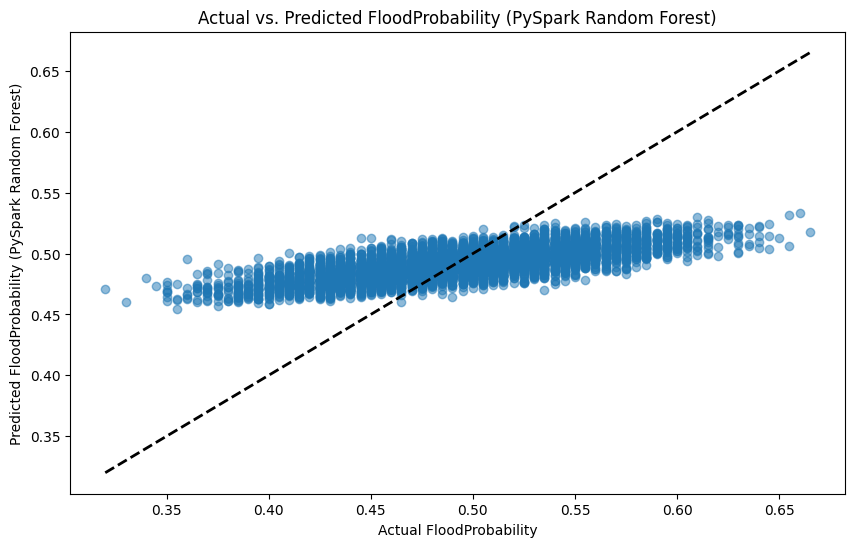

In [35]:
actual_rf_spark = predictions_rf_spark.select(target_col).rdd.flatMap(lambda x: x).collect()
predicted_rf_spark = predictions_rf_spark.select("prediction").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 6))
plt.scatter(actual_rf_spark, predicted_rf_spark, alpha=0.5)
plt.plot([min(actual_rf_spark), max(actual_rf_spark)], [min(actual_rf_spark), max(actual_rf_spark)], 'k--', lw=2)
plt.xlabel(f"Actual {target_col}")
plt.ylabel(f"Predicted {target_col} (PySpark Random Forest)")
plt.title(f"Actual vs. Predicted {target_col} (PySpark Random Forest)")
plt.show()

# Stop Spark session
spark.stop()